# Чтение и запись данных


In [1]:
import urllib.request as req
import json
import pandas as pd
from matplotlib import pyplot as plt

## 18.1. Чтение данных из web-сервиса
***
### Практика

#### Задание 1

Используя сервис MetaWeather, найдите идентификатор города Париж (Paris). Для запроса используйте адрес из следующей ячейки, заменив `%city%` на имя города.

In [2]:
city = 'Paris'
url = f"https://www.metaweather.com/api/location/search/?query={city}"
url

'https://www.metaweather.com/api/location/search/?query=Paris'

In [4]:
# вызов api для получения данных по городу
with req.urlopen(url) as session:
    response = session.read().decode()

In [5]:
# преобразуем ответ в JSON
response = json.loads(response)
print(response)

# извлечем идентификатор города 
city_id = response[0]['woeid']
print(city_id)

[{'title': 'Paris', 'location_type': 'City', 'woeid': 615702, 'latt_long': '48.856930,2.341200'}]
615702


#### Задание 2

Используя полученный идентификатор города, запросите данные о погоде в Париже за 28 мая 2020 года. Для запроса используйте адрес из следующей ячейки, заменив `%city_id%`, `%year%`, `%month%`, `%day%` на идентификатор города, год, месяц и день соответственно.

In [7]:
# сформируем запрос для получения сведений по погоде по определенному городу, году, месяцу и году
year, month, day  = '2020', '06', '28'

url = f'https://www.metaweather.com/api/location/{city_id}/{year}/{month}/{day}/'
print(url)

https://www.metaweather.com/api/location/615702/2020/06/28/


In [10]:
# выполним запрос для получения данных

with req.urlopen(url) as session:
    response = session.read().decode()

# response = json.loads(response)
# response

In [11]:
# загрузим полученный ответ в датафрейм пандас 
df = pd.read_json(response, convert_dates=['created', 'applicable_date'])


In [12]:
df.dtypes

id                                      int64
weather_state_name                     object
weather_state_abbr                     object
wind_direction_compass                 object
created                   datetime64[ns, UTC]
applicable_date                datetime64[ns]
min_temp                              float64
max_temp                              float64
the_temp                              float64
wind_speed                            float64
wind_direction                        float64
air_pressure                          float64
humidity                                int64
visibility                            float64
predictability                          int64
dtype: object

In [13]:
df.head()

,id,weather_state_name,weather_state_abbr,wind_direction_compass,created,applicable_date,min_temp,max_temp,the_temp,wind_speed,wind_direction,air_pressure,humidity,visibility,predictability
0,4689894351831040,Showers,s,WSW,2020-06-28 21:37:04.785995+00:00,2020-06-28,16.605,21.605,20.955,8.342198,243.501678,1015.5,59,12.268042,73
1,6422688522305536,Showers,s,WSW,2020-06-28 18:37:05.388908+00:00,2020-06-28,15.920,23.420,22.860,8.366793,238.833985,1015.5,52,12.343228,73
2,4716131417849856,Showers,s,WSW,2020-06-28 15:37:05.758353+00:00,2020-06-28,15.920,23.420,22.860,8.366793,238.833985,1015.5,52,12.343228,73
3,5549963515789312,Showers,s,WSW,2020-06-28 12:37:04.581450+00:00,2020-06-28,15.795,22.490,20.470,8.180382,238.170711,1016.0,60,12.343228,73
4,5317515624316928,Showers,s,WSW,2020-06-28 09:37:05.381099+00:00,2020-06-28,15.780,21.790,20.495,7.936166,237.834144,1016.0,60,11.450318,73


In [15]:
df.describe()

,id,min_temp,max_temp,the_temp,wind_speed,wind_direction,air_pressure,humidity,visibility,predictability
count,7.200000e+01,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,62.000000,72.000000
mean,5.673635e+15,16.899444,24.360417,22.786111,6.285630,237.333002,1016.881944,57.930556,11.406591,73.388889
std,6.071806e+14,1.510339,2.673790,2.707341,2.542831,34.495394,1.792970,7.075700,1.354357,1.788504
min,4.545088e+15,15.130000,20.490000,19.350000,1.485077,53.500000,1012.000000,38.000000,8.979124,68.000000
25%,5.273664e+15,15.653750,22.435000,21.003750,4.346394,234.287959,1016.000000,52.000000,9.999727,73.000000
50%,5.583813e+15,15.920000,23.527500,22.010000,7.948878,239.180156,1016.500000,57.000000,11.551601,73.000000
75%,6.242597e+15,18.083750,26.156250,23.505000,8.396536,246.625000,1019.000000,61.000000,12.465017,73.000000
max,6.745603e+15,20.880000,32.280000,32.280000,9.587809,317.000000,1020.000000,79.000000,13.739138,77.000000


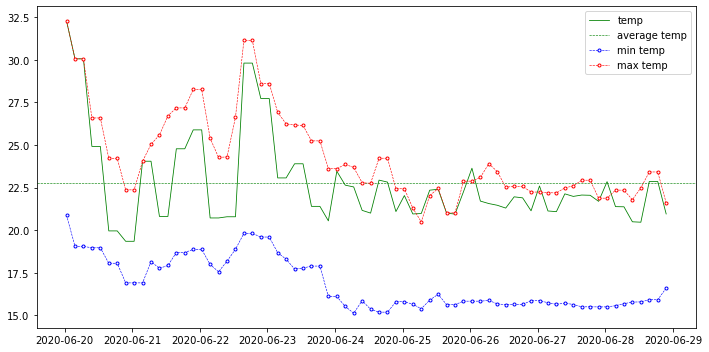

In [75]:
fig = plt.figure(figsize=(10,5))
plt.plot(df['created'].values, df['the_temp'].values, 'g-', linewidth=.8, label='temp')
plt.axhline(y=df['the_temp'].mean(), color='g', linestyle='--', linewidth=.6, label='average temp',)

plt.plot(df['created'].values, df['min_temp'].values, 'bo--', label='min temp', linewidth=.6, markersize=3, mfc='w')
plt.plot(df['created'].values, df['max_temp'].values, 'ro--', label='max temp', linewidth=.6, markersize=3, mfc='w')

plt.legend()
plt.tight_layout()
plt.show()

## 18.2 Чтение и запись файлов в формате JSON
***
### Практика

#### Задание 1

Используя сервис **MetaWeather**, найдите идентификатор *Москвы (Moscow)*. Для запроса используйте адрес из следующей ячейки, заменив *%city%* на имя города.

In [76]:
city_name = 'Moscow'
url = f"https://www.metaweather.com/api/location/search/?query={city_name}"
url

In [80]:
with req.urlopen(url) as session:
    response = session.read().decode()
    data = json.loads(response)

data

[{'title': 'Moscow',
  'location_type': 'City',
  'woeid': 2122265,
  'latt_long': '55.756950,37.614971'}]

#### Задание 2 

Используя полученный идентификатор города, запросите данные о погоде в Москве за 28 апреля 2020 года. Для запроса используйте адрес из следующей ячейки, заменив `%city_id%`, `%year%`, `%month%`, `%day%` на идентификатор города, год, месяц и день соответственно.

In [84]:
city_id = data[0]['woeid']
city_id
year, month, day = 2020, 4, 28

url = f'https://www.metaweather.com/api/location/{city_id}/{year}/{month}/{day}/'
url

with req.urlopen(url) as session:
    response = session.read().decode()
    data = json.loads(response)

#### Задание 3 

Сохраните полученные данные в файл `file.json`. Для форматирования файла используйте четыре пробела.

In [86]:
# выгрузим данные в файл    
file_name = 'moscow_weather.json'

with open(file_name, 'w') as file:
    json.dump(data, file, indent=4)

    

#### Задание 4 

Загрузите содержимое файла `file.json` в DataFrame и выведите первые пять строк на экран.

In [87]:
pd.read_json(file_name).head()

,id,weather_state_name,weather_state_abbr,wind_direction_compass,created,applicable_date,min_temp,max_temp,the_temp,wind_speed,wind_direction,air_pressure,humidity,visibility,predictability
0,4520607007899648,Showers,s,WNW,2020-04-28T18:27:32.227221Z,2020-04-28,3.670,10.915,9.965,4.550169,297.501335,1009.0,39,12.064543,73
1,5728158202462208,Showers,s,WNW,2020-04-28T15:27:32.320780Z,2020-04-28,3.670,10.915,9.920,4.550169,297.501335,1009.0,39,12.064543,73
2,5480870762774528,Showers,s,NW,2020-04-28T12:27:32.389465Z,2020-04-28,3.305,10.225,8.145,4.519929,308.334994,1009.5,51,12.064543,73
3,5972593918083072,Showers,s,NW,2020-04-28T09:27:32.493205Z,2020-04-28,3.195,9.915,8.025,4.555980,308.667384,1009.5,51,10.536902,73
4,5468569036914688,Showers,s,NW,2020-04-28T06:27:31.423059Z,2020-04-28,1.425,10.260,8.765,4.571307,308.667384,1009.5,47,12.849024,73


## 18.3 Чтение из баз данных с помощью pandas и sqlalchemy
***
### Подготовка

#### Установка psycopg2

для установки [psycopg2 в окружении anaconda](https://anaconda.org/anaconda/psycopg2) нужно выполнить комманду в Anaconda Prompt

`conda install -c anaconda psycopg2`

Справка:
>PostgreSQL, пожалуй, это самая продвинутая реляционная база данных в мире Open Source Software. По своим функциональным возможностям она не уступает коммерческой БД Oracle и на голову выше собрата MySQL.
Если вы создаёте на Python веб-приложения, то вам не избежать работы с БД. В Python самой популярной библиотекой для работы с PostgreSQL является psycopg2. Эта библиотека написана на Си на основе libpq.

#### Установка sqlalchemy

для установки [sqlalchemy в окружении anaconda](https://anaconda.org/anaconda/sqlalchemy) нужно выполнить комманду в Anaconda Prompt

`conda install -c anaconda sqlalchemy`

Справка:
>SQLAlchemy - это набор инструментов Python SQL и Object Relational Mapper, который дает разработчикам приложений полную мощность и гибкость SQL.

### Практика

#### Задание 1

Подключитесь к базе данных, загрузите содержимое таблицы `course_purchases` в DataFrame и выведите первые 10 строк на экран.

In [1]:
import sqlalchemy 
import psycopg2

https://khashtamov.com/ru/postgresql-python-psycopg2/